In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def size(x):
    return np.dot(x, x) ** .5

In [7]:
camera = np.array([10.0, 10.0, 10.0])
head = np.array([0.0, 0.0, 1.0])

perp_head = head - np.dot(camera, head) / size(camera) ** 2 * camera

In [8]:
canvas_x = np.cross(perp_head, camera)
canvas_x /= size(canvas_x)
canvas_y = perp_head / size(perp_head)
canvas_x, canvas_y

(array([-0.70710678,  0.70710678,  0.        ]),
 array([-0.40824829, -0.40824829,  0.81649658]))

In [5]:
def is_visible(x, y, z):
    dist = np.dot(camera, np.array([x, y, z])) / size(camera) - size(camera)
    if dist > 0:
        return False
    return -dist
def to_canvas(x, y, z):
    v = np.array([x, y, z])
    p = v - np.dot(v, camera) / size(camera) ** 2 * camera
    return np.dot(p, canvas_x), np.dot(p, canvas_y)

    



(-1.0999260118497822,
 1.0999883175762097,
 -0.9432327481038429,
 0.9431768167160908)

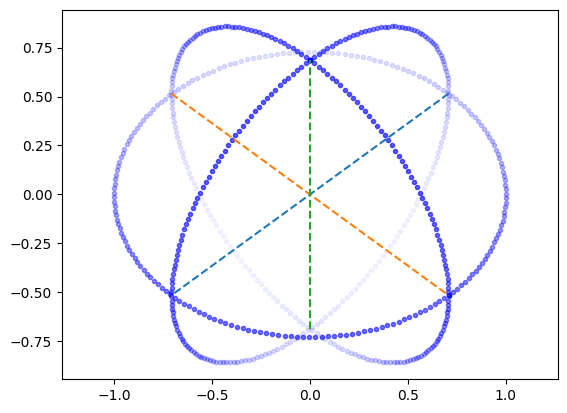

In [6]:
data1x = []
data1y = []
theta = np.linspace(0, np.pi * 2, 200)

for i in theta:
    x, y, z = np.sin(i), np.cos(i), 0
    for x, y, z in [(np.sin(i), np.cos(i), 0), (np.sin(i), 0, np.cos(i)), (0, np.sin(i), np.cos(i))]:
        dist = is_visible(x, y, z)
        if dist:
            a, b = to_canvas(x, y, z)
            data1x.append(a)
            data1y.append(b)
            plt.plot(a, b, '.', color='blue', alpha=1 - (dist - size(camera) + 2) / 3)

axis = np.linspace(-1, 1, 100)
xaxis = [[], []]
yaxis = [[], []]
zaxis = [[], []]
for i in axis:
    a, b = to_canvas(i, 0, 0)
    xaxis[0].append(a)
    xaxis[1].append(b)
    a, b = to_canvas(0, i, 0)
    yaxis[0].append(a)
    yaxis[1].append(b)
    a, b = to_canvas(0, 0, i)
    zaxis[0].append(a)
    zaxis[1].append(b)
plt.plot(xaxis[0], xaxis[1], '--')
plt.plot(yaxis[0], yaxis[1], '--')
plt.plot(zaxis[0], zaxis[1], '--')

# plt.plot(data1x, data1y, '.')
plt.axis('equal')